# AI3601 Homework 2 
## Due: 23:59:59 (GMT +08:00), April 4, 2024 ##

## 1 Environment--Random Walk

State space: Like the picture following, there are $7$ states {$A,B,C,D,E,Terminal\_ left,Terminal\_ right$}

![](./random_walk.png)

Action space: In the state of {$A,B,C,D,E$} , we can choose from {$LEFT$,$RIGHT$} ;  in the state of {$Terminal\_ left,Terminal\_ right$} , we finish the episode

Reward: When the agent is in state E , it will get a reward of $1$ with the action $RIGHT$ . Agent gets **reward 0 in other condition**.

Policy: uniformly sampling from {$LEFT$,$RIGHT$}

In [25]:
import copy
import numpy as np
from matplotlib import pyplot as plt

In [26]:
class RandomWalk:
    def __init__(self):
        self.state2id = {"terminal_0": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "terminal_1": 6}
        self.start_id = self.state2id["C"]

    def get_next_state_reward(self, id_):
        if id_ == self.state2id['terminal_0'] or id_ == self.state2id["terminal_1"]:
            return (None, None)
        else:
            if np.random.random() > 0.5:
                next_state = id_ - 1
            else:
                next_state = id_ + 1
        reward = 0
        if next_state == self.state2id["terminal_1"]:
            reward = 1
        return (next_state, reward)

### 1.1 Value Function Approximation


Here, we will implement 2 algorithms: (A) Monte-Carlo methods and (B) Temporal Difference Learning. Then, you are required to answer the following **2** questions.

Before coding, you are required to **compute the true Value function**.

In [27]:
# We ONLY consider {A, B, C, D, E}, cause Terminal_left and Terminal_right are setting 

true_value = [1/6, 1/3, 1/2, 2/3, 5/6]
print('true value:', true_value)

true value: [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333334]


### (A) Monte-Carlo methods

For n episodes:

&nbsp; &nbsp; (1) run episode and get $G_{t}$

&nbsp; &nbsp; (2) update value function and back to (1)

**Iteration function**: $V(S_{t})\leftarrow V(S_{t})+\alpha(G_{t}-V(S_{t}))$

Here you are required to implement `run_mc_algo()`. It returns a two-layer list `ans`, like `[[0,0,0,0,0], [0,0,0,0,0], ...]`

The $i$-th element of `ans` means the value function after $i$-th episodes iteration

In [28]:
# alpha: parameter of MC algorithm, float
# initial_val: the initial value function, list
# num_of_episodes: the episodes the algorithm would take, int
# env: an environment, RandomWalk

def run_mc_algo(alpha, initial_val, num_of_episodes, env: RandomWalk):
    """ YOUR CODE HERE """
    return_value_set = [[0, 0, 0, 0, 0]] * num_of_episodes
    value_set = copy.deepcopy(initial_val)
    for i in range(num_of_episodes):
        state_id = env.start_id
        episode = []
        while state_id != env.state2id["terminal_0"] and state_id != env.state2id["terminal_1"]:
            next_state, reward = env.get_next_state_reward(state_id)
            episode.append((state_id, reward))
            state_id = next_state
        gain = 0
        for j in range(len(episode) - 1, -1, -1):
            state_id, reward = episode[j]
            gain += reward
            value_set[state_id - 1] += alpha * (gain - value_set[state_id - 1])
        return_value_set[i] = copy.deepcopy(value_set)
    """ END CODE HERE """
    return return_value_set

### (B) Temporal Difference Learning

Given $n$, $\gamma$

Loop for each episodes:

&nbsp; &nbsp; Initialize Value Function

&nbsp; &nbsp; Loop for step in each episode:

&nbsp; &nbsp; &nbsp; &nbsp; (1) Take action and observe next state S' and Reward

&nbsp; &nbsp; &nbsp; &nbsp; (2) Update value function and $S\leftarrow S'$

**Iteration function**: $V(S)\leftarrow V(S)+\alpha(R+\gamma V(S')-V(S))$

Here you are required to implement `run_td_algo()`. It returns a two-layer list `ans`, like `[[0,0,0,0,0], [0,0,0,0,0], ...]`

The $i$-th element of `ans` means the value function after $i$-th episodes iteration

In [29]:
# alpha: parameter of TD algorithm, float
# gamma: parameter of TD algorithm, float
# initial_val: the initial value function, list
# num_of_episodes: the episodes the algo would take, int 
# env: an environment, RandomWalk

def run_td_algo(alpha, gamma, initial_val, num_of_episodes, env: RandomWalk):
    """ YOUR CODE HERE """
    return_value_set = [[0, 0, 0, 0, 0]] * num_of_episodes
    value_set = copy.deepcopy(initial_val)
    for i in range(num_of_episodes):
        state_id = env.start_id
        while state_id != env.state2id["terminal_0"] and state_id != env.state2id["terminal_1"]:
            next_state_id, reward = env.get_next_state_reward(state_id)
            if next_state_id == env.state2id["terminal_0"] or next_state_id == env.state2id["terminal_1"]:
                next_state_value = 0
            else:
                next_state_value = value_set[next_state_id - 1]
            value_set[state_id - 1] += alpha * (reward + gamma * next_state_value - value_set[state_id - 1])
            state_id = next_state_id
        return_value_set[i] = copy.deepcopy(value_set)
    """ END CODE HERE """
    return return_value_set

In [30]:
def RMS_error(true_value, predict_value):
    t_ = np.array(true_value) - np.array(predict_value)
    return np.sqrt(np.sum(np.power(t_, 2)) / len(true_value))

### 1.2 Run two algorithms and Visualization

Here, we try to run two algorithms in our environment .You should run the following code without editing. **Your output will be one of the criteria we use to score**.

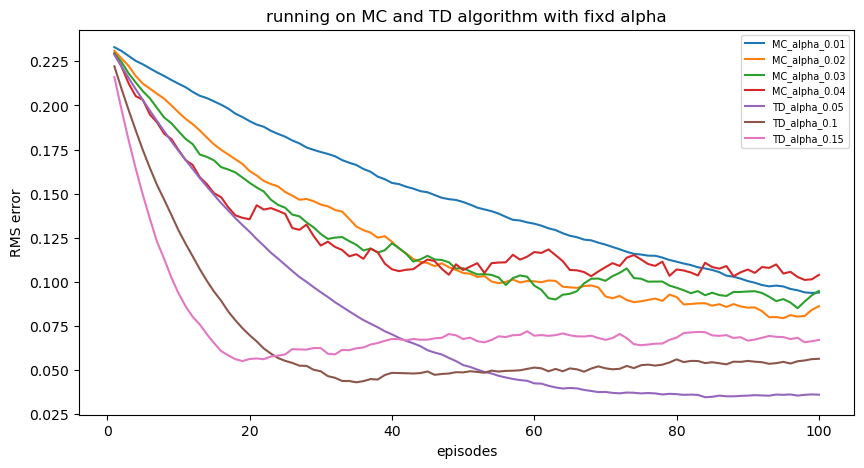

In [31]:
value = 0.5
initial_value = [value] * 5
env = RandomWalk()
max_episide = 200
average=100
alpha_mc = [0.01, 0.02, 0.03, 0.04]
alpha_td = [0.05, 0.1, 0.15]

mc_loss = []
td_loss = []

for j in range(len(alpha_mc)):
    mc_loss_ = np.zeros((max_episide,))
    for i in range(average):
        t = run_mc_algo(alpha_mc[j], initial_value, max_episide, env)
        mc_loss_ += np.array([RMS_error(true_value, t[z]) for z in range(max_episide)]) / average
    mc_loss.append(list(mc_loss_))

for j in range(len(alpha_td)):
    td_loss_=np.zeros((max_episide,))
    for i in range(average):
        t = run_td_algo(alpha_td[j], 1, initial_value, max_episide, env)
        td_loss_ += np.array([RMS_error(true_value, t[z]) for z in range(max_episide)]) / average
    td_loss.append(list(td_loss_))

x_axis = [i + 1 for i in range(100)]

fig = plt.figure(figsize=(10, 5))
plt.title("running on MC and TD algorithm with fixd alpha")
plt.xlabel("episodes")
plt.ylabel("RMS error")
for i in range(len(mc_loss)):
    plt.plot(x_axis, mc_loss[i][:100], label="MC_alpha_{}".format(alpha_mc[i]))
for i in range(len(td_loss)):
    plt.plot(x_axis, td_loss[i][:100], label="TD_alpha_{}".format(alpha_td[i]))
plt.legend(prop={"size": 7})
plt.show()

**Questions**

- Discuss the impact of hyper-parameters like $\alpha$ to MC and TD.
    - $\alpha$ determines the learning rate of the algorithm, controlling the extent to which the new information will override the old information. A high learning rate makes the algorithm learn faster, but may also make training unstable. A low learning rate makes the algorithm learn slower, but can stabilize the training process and improve the final performance.
    - $\gamma$ is the discount factor for future rewards, which is typically used to compute the value function. A high discount factor allows the agent to explore long-term rewards, while a low discount factor encourages the agent to fetch immediate rewards.

- Discuss the difference between two algorithms.
    - Monte-Carlo methods update the value function based on the return of the entire episode, while Temporal Difference Learning updates the value function based on the return of the current step. Therefore, Temporal Difference Learning updates more flexibly and frequently compared to Monte-Carlo methods.
    - Monte-Carlo methods applies an unbiased estimate of the value function, while Temporal Difference Learning applies a biased estimate of the value function. Therefore, Monte-Carlo methods tend to have lower bias but higher variance compared to Temporal Difference Learning.
    - As we can see in the visualization, Temporal Difference Learning converges much faster than Monte-Carlo methods. Within the same number of episodes, Temporal Difference Learning can achieve a better estimate of the value function.

### 1.3 TD and MC algorithm with Exponential Moving Average alpha

There is an intuition in TD and MC learning: the data we get from later episodes are more time-efficient and important than earlier. Hence, we take a dynamic alpha to verify this intuition.

When trying to update $V(S_{t})$, we take a time-varying learning rate $\alpha _{n} = \frac{1}{n} \cdot \alpha _{0 }$, where $n$ is the times of updating $V(S_{t})$. You are required to implement the TD and MC algorithm with such a dynamic alpha in the following code.

As before, It returns a two-layer list `ans`, like `[[0,0,0,0,0], [0,0,0,0,0], ...]`

The $i$-th element of `ans` means the value function after $i$-th episodes iteration

In [32]:
# mc algorithm

def run_mc_algo_dynamic_alpha(ini_alpha, initial_val, num_of_episodes, env: RandomWalk):
    """ YOUR CODE HERE """
    return_value_set = [[0, 0, 0, 0, 0]] * num_of_episodes
    value_set = copy.deepcopy(initial_val)
    for i in range(num_of_episodes):
        state_id = env.start_id
        episode = []
        while state_id != env.state2id["terminal_0"] and state_id != env.state2id["terminal_1"]:
            next_state, reward = env.get_next_state_reward(state_id)
            episode.append((state_id, reward))
            state_id = next_state
        gain = 0
        for j in range(len(episode) - 1, -1, -1):
            state_id, reward = episode[j]
            gain += reward
            value_set[state_id - 1] += ini_alpha / (i + 1) * (gain - value_set[state_id - 1])
        return_value_set[i] = copy.deepcopy(value_set)
    """ END CODE HERE """
    return return_value_set

In [33]:
# td algorithm

def run_td_algo_dynamic_alpha(ini_alpha, gamma, initial_val, num_of_episodes, env: RandomWalk):
    """ YOUR CODE HERE """
    return_value_set = [[0, 0, 0, 0, 0]] * num_of_episodes
    value_set = copy.deepcopy(initial_val)
    for i in range(num_of_episodes):
        state_id = env.start_id
        while state_id != env.state2id["terminal_0"] and state_id != env.state2id["terminal_1"]:
            next_state_id, reward = env.get_next_state_reward(state_id)
            if next_state_id == env.state2id["terminal_0"] or next_state_id == env.state2id["terminal_1"]:
                next_state_value = 0
            else:
                next_state_value = value_set[next_state_id - 1]
            value_set[state_id - 1] += ini_alpha / (i + 1) * (reward + gamma * next_state_value - value_set[state_id - 1])
            state_id = next_state_id
        return_value_set[i] = copy.deepcopy(value_set)
    """ END CODE HERE """
    return return_value_set

### 1.4 Visualization the Influence of alpha

Here, we try to run two algorithms with dynamic alpha in our environment. You should run the following code without editing. **Your output will be one of the criteria we use to score**.

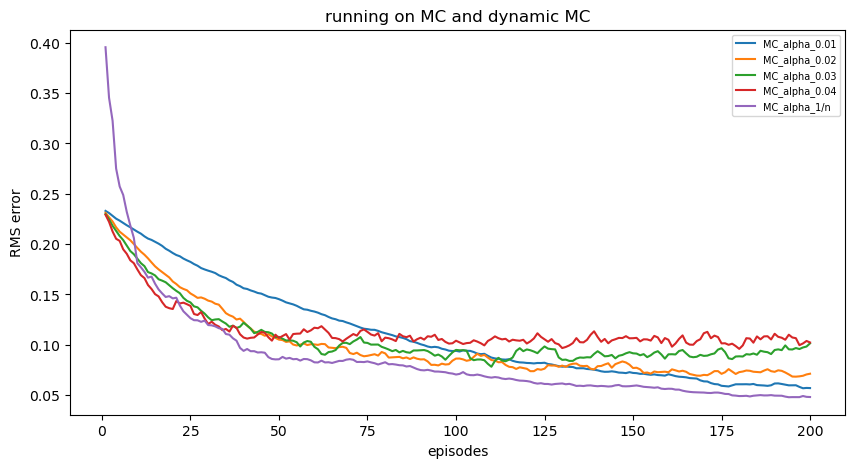

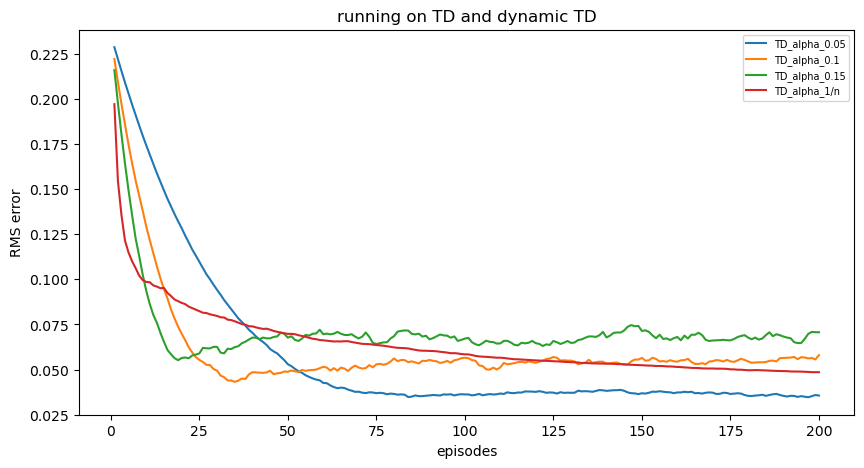

In [34]:
mc_loss_dynamic = []
td_loss_dynamic = []

mc_loss_ = np.zeros((max_episide,))
for i in range(average):
    t = run_mc_algo_dynamic_alpha(1, initial_value, max_episide, env)
    mc_loss_ += np.array([RMS_error(true_value, t[z]) for z in range(max_episide)]) / average
mc_loss_dynamic = list(mc_loss_)

td_loss_ = np.zeros((max_episide,))
for i in range(average):
    t = run_td_algo_dynamic_alpha(1, 1, initial_value, max_episide, env)
    td_loss_ += np.array([RMS_error(true_value, t[z]) for z in range(max_episide)]) / average
td_loss_dynamic = list(td_loss_)

x_axis = [i + 1 for i in range(max_episide)]

fig1 = plt.figure(figsize=(10, 5))
plt.title("running on MC and dynamic MC")
plt.xlabel("episodes")
plt.ylabel("RMS error")
for i in range(len(mc_loss)):
    plt.plot(x_axis, mc_loss[i], label="MC_alpha_{}".format(alpha_mc[i]))
plt.plot(x_axis, mc_loss_dynamic, label="MC_alpha_1/n")
plt.legend(prop={"size": 7})
plt.show()

fig2 = plt.figure(figsize=(10, 5))
plt.title("running on TD and dynamic TD")
plt.xlabel("episodes")
plt.ylabel("RMS error")
for i in range(len(td_loss)):
    plt.plot(x_axis, td_loss[i], label="TD_alpha_{}".format(alpha_td[i]))
plt.plot(x_axis, td_loss_dynamic, label="TD_alpha_1/n")
plt.legend(prop={"size": 7})
plt.show()

**Questions**

- Discuss the impact of the exponential moving average alpha in MC and TD algorithm.
    - The exponential moving average alpha serves the same purpose as learning rate decay. As the number of updates increases, each update accounts for a smaller proportion of the value function. Therefore, the exponential moving average alpha balances the current update and the historical information, which stablizes the training process and improves the final performance.
    - As we can see in the visualization, the exponential moving average alpha stablizes the training process of both MC and TD algorithms, especially for the Temporal Difference Learning. In addition, Monte-Carlo methods achieve much smaller RMS error with the trick.

## 2 Implementing SARSA and Q-Learning Algorithms in Cliff-Walking

In this part, you are required to implement the SARSA and Q-learning algorithms for the cliff-walking problem. 

### 2.1 Environment description

In this problem, the agent starts in the bottom left corner and is expected to reach the bottom right corner. Stepping into the cliff that segregates those tiles yields a massive negative reward and ends the episode. Otherwise, each step comes at a small cost, meaning the shortest path is the optimal policy (please see codes for more details).

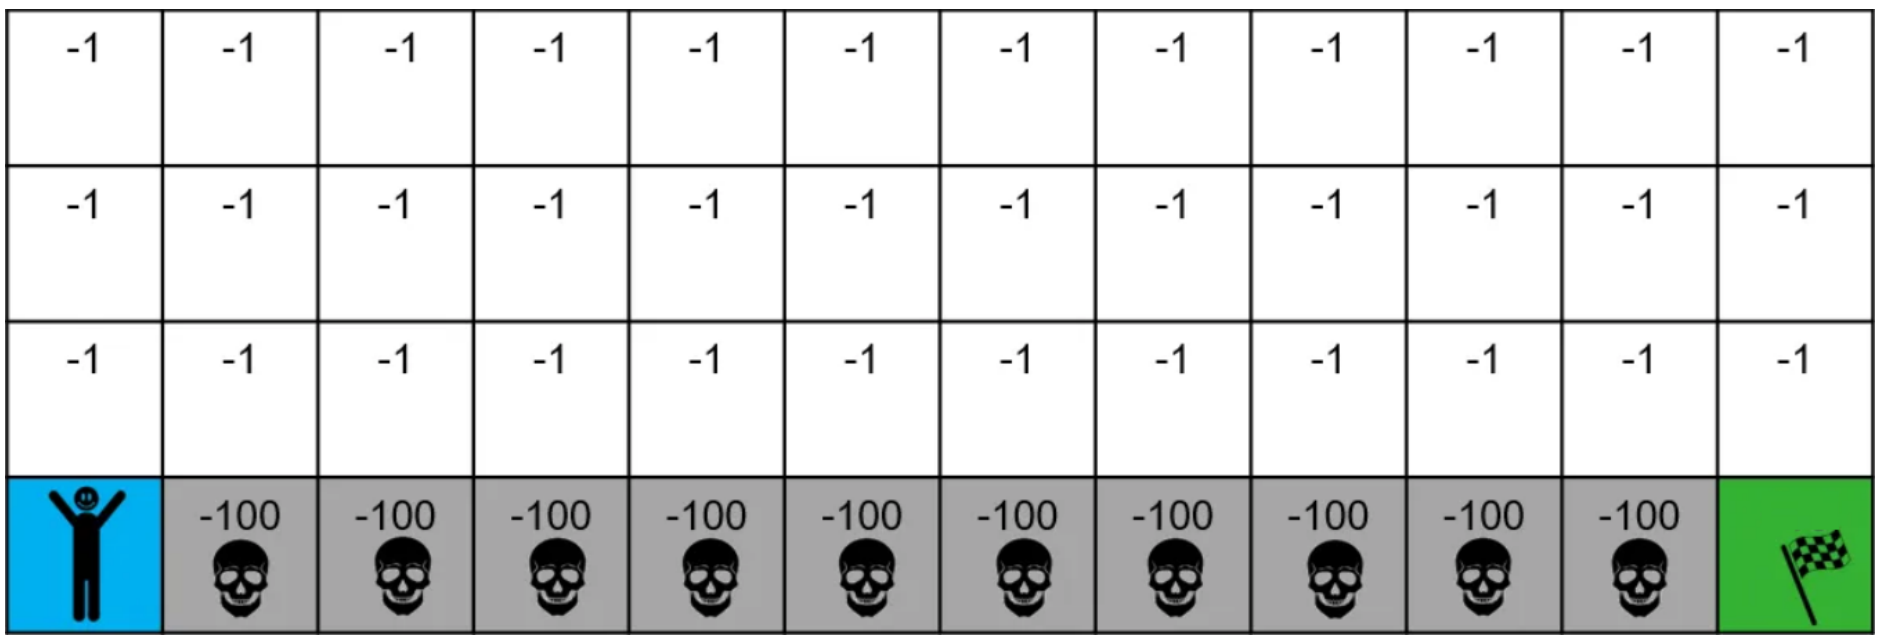


In [35]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [36]:
class Env():
    def __init__(self, length, height):
        self.length = length
        self.height = height
        self.x = 0           
        self.y = 0

    def render(self, frames=50):
        for i in range(self.height):
            if i == 0: 
                line = ['S'] + ['x'] * (self.length - 2) + ['T']
            else:
                line = ['.'] * self.length
            if i == self.x:
                line[self.y] = 'o'
            print(''.join(line))
        print('\033[' + str(self.height + 1) + 'A')  
        time.sleep(1.0 / frames)

    def step(self, action):
        """ 4 legal actions, 0: up, 1: down, 2: left, 3: right """
        change = [[0, 1], [0, -1], [-1, 0], [1, 0]]
        tx, ty = self.x + change[action][0], self.y + change[action][1]
        self.x = min(self.height - 1, max(0, tx))
        self.y = min(self.length - 1, max(0, ty))
        states = [self.x, self.y]
        reward = -1
        terminal = False
        if self.x == 0:
            if self.y > 0:
                terminal = True
                if self.y != self.length - 1:
                    reward = -100
        return reward, states, terminal

    def reset(self):
        self.x = 0
        self.y = 0

### 2.2 Implementing the $\epsilon$-greedy policy

Below is the base Q table for SARSA and Q-learning. 

**Coding exercise.** Please implement the $\epsilon$-greedy policy in `take_action()`.

In [37]:
class Base_Q_table():
    def __init__(self, length, height, actions=4, alpha=0.1, gamma=0.9, eps=0.1):
        self.table = [0] * actions * length * height
        self.actions = actions
        self.length = length
        self.height = height
        self.alpha = alpha
        self.gamma = gamma
        self.eps = eps

    def _index(self, a, x, y):
        return a * self.height * self.length + x * self.length + y

    def best_action(self, x, y):
        '''
        return: the best action of current position (x, y)
        '''
        mav = -100000
        mapos = -1
        change = [[0, 1], [0, -1], [-1, 0], [1, 0]]
        for i in range(self.actions):
            tx, ty = x + change[i][0], y + change[i][1]
            if min(tx, ty) < 0 or tx >= self.height or ty >= self.length:
                continue
            if self.table[self._index(i, x, y)] > mav:
                mav = self.table[self._index(i, x, y)]
                mapos = i
        return mapos

    def _epsilon(self, num_episode=0):
        return self.eps

    def max_q(self, x, y):
        action = self.best_action(x, y)
        return self.table[self._index(action, x, y)]

    def take_action(self, x, y, num_episode=1, method='eps_greedy'):
        '''
        method: 'eps_greedy' denotes that taking actions using epsilon greedy (used as the policy for SARSA, and the behavior policy for Q-Learning), 'full_greedy' denotes that taking actions fully greedy w.r.t. the current estimated Q table.
        '''
        """ YOUR CODE HERE """
        if method == 'eps_greedy' and np.random.random() < self._epsilon(num_episode):
            action = np.random.randint(0, self.actions)
        else:
            action = self.best_action(x, y)
        """ END CODE HERE """
        return action

    def update(self, direct, next_direct, s0, s1, reward, is_terminated):
        pass

### 2.3 Implementing the SARSA algorithm

**Coding exercise.**  In the following code, please implement the `update()` function, which updates the Q-table for SARSA, and the `cliff_walk()` function, which instantiates the SARSA algorithm.

In [38]:
class Q_table_sarsa(Base_Q_table):
    def __init__(self, length, height, actions=4, alpha=0.1, gamma=0.9, eps=0.1):
        super().__init__(length, height, actions, alpha = alpha, gamma = gamma, eps=eps)

    def update(self, direct, next_direct, s0, s1, reward, is_terminated):
        """ YOUR CODE HERE """
        if is_terminated:
            self.table[self._index(direct, s0[0], s0[1])] += self.alpha * (reward - self.table[self._index(direct, s0[0], s0[1])])
        else:
            self.table[self._index(direct, s0[0], s0[1])] += self.alpha * (reward + self.gamma * self.table[self._index(next_direct, s1[0], s1[1])] - self.table[self._index(direct, s0[0], s0[1])])
        """ END CODE HERE """
        return

    def cliff_walk(self):
        """ YOUR CODE HERE """
        env = Env(self.length, self.height)
        rewards = []
        for episode in range(1000):
            env.reset()
            episode_return = 0
            state = [0, 0]
            direct = self.take_action(state[0], state[1], episode)
            is_terminated = False
            while not is_terminated:
                reward, next_state, is_terminated = env.step(direct)
                next_direct = self.take_action(next_state[0], next_state[1], episode)
                self.update(direct, next_direct, state, next_state, reward, is_terminated)
                episode_return += reward
                state = next_state
                direct = next_direct
            rewards.append(episode_return)
        """ END CODE HERE """
        return rewards

### 2.4 Implementing the Q-learning algorithm

**Coding exercise.**  In the following code, please implement the `update()` function, which updates the Q-table for Q-learning, and the `cliff_walk()` function, which instantiates the Q-learning algorithm.

In [39]:
class Q_table_qlearning(Base_Q_table):
    def __init__(self, length, height, gamma, actions=4, alpha=0.005, eps=0.1):
        super().__init__(length, height, actions, alpha = alpha, gamma = gamma, eps=eps)

    def update(self, a, s0, s1, r, is_terminated):
        """ YOUR CODE HERE """
        if is_terminated:
            self.table[self._index(a, s0[0], s0[1])] += self.alpha * (r - self.table[self._index(a, s0[0], s0[1])])
        else:
            self.table[self._index(a, s0[0], s0[1])] += self.alpha * (r + self.gamma * self.max_q(s1[0], s1[1]) - self.table[self._index(a, s0[0], s0[1])])
        """ END CODE HERE """
        return

    def cliff_walk(self):
        """ YOUR CODE HERE """
        env = Env(self.length, self.height)
        reward_eps_greedy = []
        reward_full_greedy = []
        for episode in range(1000):
            env.reset()
            episode_return = 0
            state = [0, 0]
            is_terminated = False
            while not is_terminated:
                action = self.take_action(state[0], state[1], episode, method='eps_greedy')
                reward, next_state, is_terminated = env.step(action)
                self.update(action, state, next_state, reward, is_terminated)
                episode_return += reward
                state = next_state
            reward_eps_greedy.append(episode_return)
            env.reset()
            episode_return = 0
            state = [0, 0]
            is_terminated = False
            while not is_terminated:
                action = self.take_action(state[0], state[1], episode, method='full_greedy')
                reward, next_state, is_terminated = env.step(action)
                self.update(action, state, next_state, reward, is_terminated)
                episode_return += reward
                state = next_state
                if episode_return < -100:
                    break
            reward_full_greedy.append(episode_return)
        """ END CODE HERE """
        return reward_eps_greedy, reward_full_greedy

### 2.5 Comparing the performance

Please run the following code to evaluate SARSA and Q-learning with different values of $\epsilon$ in $\epsilon$-greedy. You need to show

- the performance of the SARSA algorithm with different values of $\epsilon$ in $\epsilon$-greedy;
- the performance of the Q-learning algorithm with different values of $\epsilon$ in $\epsilon$-greedy;
- the performance of Q-learning algorithm with different values of $\epsilon$ in $\epsilon$-greedy but using the **target policy** (*i.e.*, the learned optimal policy in each episode).

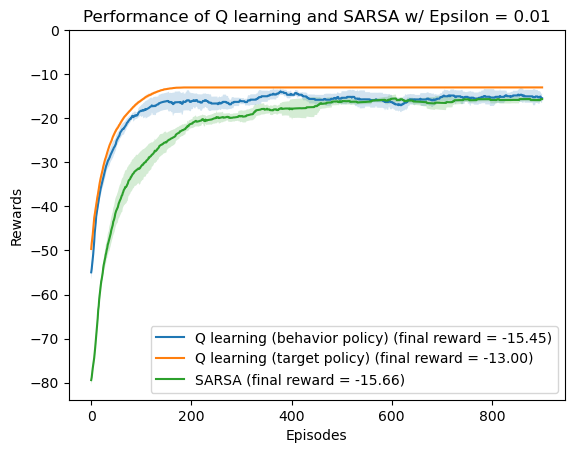

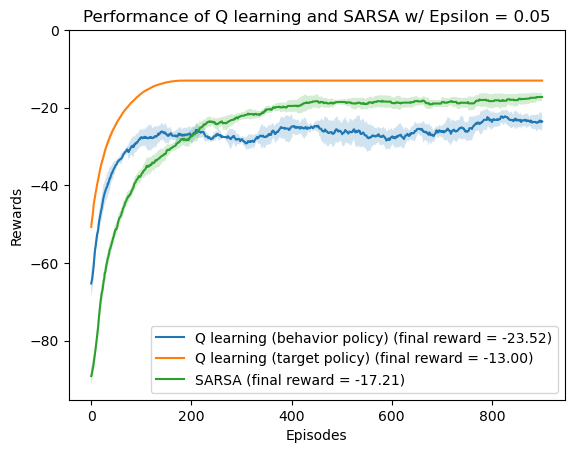

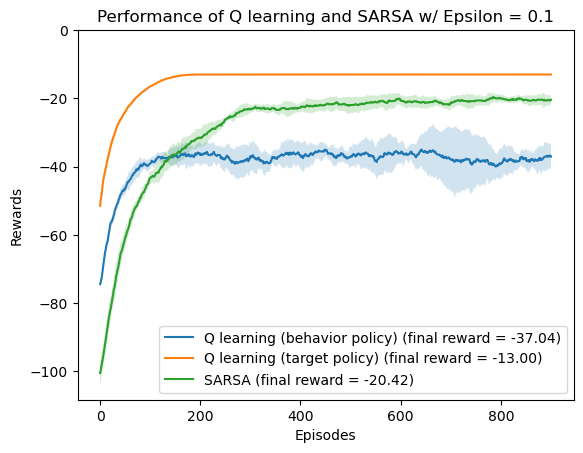

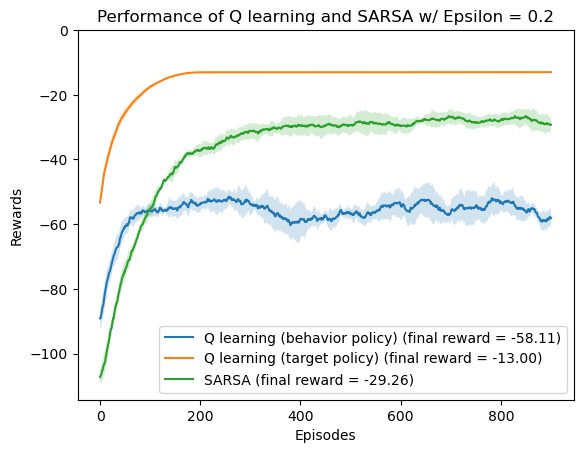

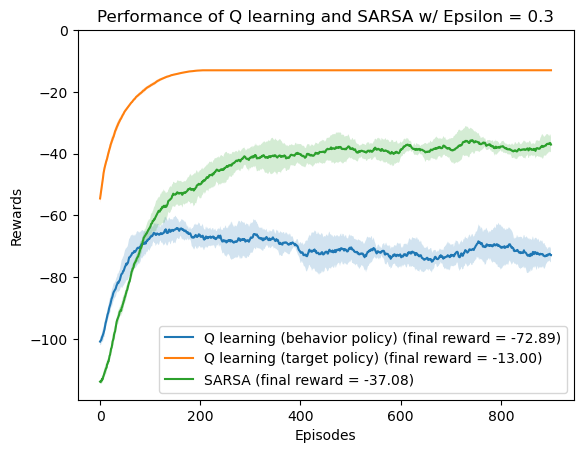

In [40]:
def plot_moving_average(data, label, window_size=100):
    def moving_average(x, w):
        return np.convolve(x, np.ones(w), 'valid') / w
    moving_averages = np.array([moving_average(row, window_size) for row in data])
    mean_moving_averages = moving_averages.mean(axis=0)
    std_dev_moving_averages = moving_averages.std(axis=0)
    plt.plot(mean_moving_averages, label=f"{label} (final reward = {mean_moving_averages[-1]:.2f})")
    plt.fill_between(range(len(mean_moving_averages)), mean_moving_averages - std_dev_moving_averages, mean_moving_averages + std_dev_moving_averages, alpha=0.2)

height, length = 4, 12
gamma = 0.95
alpha = 0.1
eps_list = [0.01, 0.05, 0.1, 0.2, 0.3]

reward_qlearning_behavior_policys = {}
reward_qlearning_target_policys = {}
reward_sarsas = {}
for eps in eps_list:
    reward_qlearning_behavior_policys[eps] = []
    reward_qlearning_target_policys[eps] = []
    reward_sarsas[eps] = []

for eps in eps_list:
    seeds = [42, 43, 44, 45, 46]
    for seed in seeds:
        agent = Q_table_qlearning(height=height, length=length, gamma=gamma, eps=eps, alpha=alpha)
        reward_qlearning_behavior_policy, reward_qlearning_target_policy = agent.cliff_walk()
        reward_qlearning_behavior_policys[eps].append(reward_qlearning_behavior_policy)
        reward_qlearning_target_policys[eps].append(reward_qlearning_target_policy)
        agent = Q_table_sarsa(height=height, length=length, gamma=gamma, eps=eps, alpha=alpha)
        reward_sarsa = agent.cliff_walk()
        reward_sarsas[eps].append(reward_sarsa)

for eps in eps_list:
    plot_moving_average(reward_qlearning_behavior_policys[eps], f"Q learning (behavior policy)")
    plot_moving_average(reward_qlearning_target_policys[eps], f"Q learning (target policy)")
    plot_moving_average(reward_sarsas[eps], f"SARSA")
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.title(f"Performance of Q learning and SARSA w/ Epsilon = {eps}")
    plt.legend()
    plt.ylim(None, 0)
    plt.show()

**Questions.** Please compare the performance of the algorithms in the above cases and give discussions about:

- What are the impacts of different values of $\epsilon$ on the performance of the above three algorithms? Explain the reasons.
  - Both SARSA and the behavior policy of Q-learning show performance degradation with the increase of $\epsilon$, which is resulted from their $\epsilon$-greedy exploration strategy. Larger $\epsilon$ means more random exploration and larger probability for failure, thus leading to the suboptimal performance.
  - The value of $\epsilon$ cannot affect the optimality of the target policy of Q-learning. This is because the target policy is deterministic with full greedy strategy. It always selects the action with the maximum Q value, regardless of the risk observed in the exploration.
- Discuss the difference between SARAS and Q-learning algorithms. Why is SARAR called an on-policy algorithm and the Q-learning algorithm called an off-policy one?
  - SARSA is an on-policy algorithm because it uses the same policy for sampling and acting. In contrast, Q-learning is an off-policy algorithm because its behavior policy differs from its target policy. Therefore, the performance of Q-learning may be inconsistent while learning and evaluating.
  - Compared with SARSA, Q-learning uses the maximum value to update the Q-table in temporal difference learning. This makes Q-learning more aggressive and likely to find the optimal policy, while SARSA tends to behave conservatively.
- What is the difference between the performance of the **behavior policy** of Q-learning algorithm and the performance of the **target policy** of Q-learning algorithm? Explain the reasons.
  - The performance of the behavior policy is significantly worse than that of the target policy. This is because the behavior policy applies the $\epsilon$-greedy strategy for exploration, where the agent may fall into the cliff with a certain probability. In contrast, the target policy is deterministic and always achieves the optimal performance regardless of the value of $\epsilon$.

### 2.6 Trajectory Visualization and Discussion of the Learned Policies

Please print out the actions under different states for the policy finally learned by SARSA and Q-learning and analyze why such results were obtained. For instance, explore whether the policy learned by different algorithms varies and the reasons behind these differences.

In [41]:
def print_policy(policy):
    states = [[-1 for _ in range(12)] for _ in range(4)]
    arrow_mapping = {-1: '.', 0: '\u2192', 1: '\u2190', 2: '\u2193', 3: '\u2191'}
    env = Env(length=12, height=4)
    is_terminated = False
    s0 = [0, 0]
    record = []
    action = policy.take_action(s0[0], s0[1], 1)
    while not is_terminated:
        _, s1, is_terminated = env.step(action)
        if s0 != s1:
            record.append((s0, action))
        next_action = policy.take_action(s1[0], s1[1], 1)
        s0 = s1
        action = next_action
    for r in record:
        (x, y), a = r
        states[x][y] = a
    for x in range(3, -1, -1):
        for y in range(12):
            print(arrow_mapping[states[x][y]], end='')
        print()
    return

def print_best_action_policy(policy):
    states = [[-1 for _ in range(12)] for _ in range(4)]
    arrow_mapping = {-1: '.', 0: '\u2192', 1: '\u2190', 2: '\u2193', 3: '\u2191'}
    env = Env(length=12, height=4)
    is_terminated = False
    s0 = [0, 0]
    record = []
    action = policy.best_action(s0[0], s0[1])
    while not is_terminated:
        _, s1, is_terminated = env.step(action)
        if s0 != s1:
            record.append((s0, action))
        next_action = policy.best_action(s1[0], s1[1])
        s0 = s1
        action = next_action
    for r in record:
        (x, y), a = r
        states[x][y] = a
    for x in range(3, -1, -1):
        for y in range(12):
            print(arrow_mapping[states[x][y]], end='')
        print()
    return

In [42]:
# For Q-learning (behavior policy)

eps_list = [0.0, 0.1, 0.2, 0.3]
for eps in eps_list:
    agent = Q_table_qlearning(height=height, length=length, gamma=gamma, eps=eps, alpha=alpha)
    agent.cliff_walk()
    print(f"Q learning (behavior) policy w/ epsilon = {eps}:")
    print_policy(agent)

Q learning (behavior) policy w/ epsilon = 0.0:
............
............
→→→→→→→→→→→↓
↑...........
Q learning (behavior) policy w/ epsilon = 0.1:
............
.........↓..
→→→→→→→→→→→↓
↑...........
Q learning (behavior) policy w/ epsilon = 0.2:
............
............
→→→→→→→→→→→↓
↑...........
Q learning (behavior) policy w/ epsilon = 0.3:
............
............
→→→→→→→→→→→↓
↑...........


In [43]:
# For Q-learning (target policy)

eps_list = [0.0, 0.1, 0.2, 0.3]
for eps in eps_list:
    agent = Q_table_qlearning(height=height, length=length, gamma=gamma, eps=eps, alpha=alpha)
    agent.cliff_walk()
    print(f"Q learning (target) policy w/ epsilon = {eps}:")
    print_best_action_policy(agent)

Q learning (target) policy w/ epsilon = 0.0:
............
............
→→→→→→→→→→→↓
↑...........
Q learning (target) policy w/ epsilon = 0.1:
............
............
→→→→→→→→→→→↓
↑...........
Q learning (target) policy w/ epsilon = 0.2:
............
............
→→→→→→→→→→→↓
↑...........
Q learning (target) policy w/ epsilon = 0.3:
............
............
→→→→→→→→→→→↓
↑...........


In [44]:
# For SARSA

eps_list = [0.0, 0.1, 0.2, 0.3]
for eps in eps_list:
    agent = Q_table_sarsa(height=height, length=length, gamma=gamma, eps=eps, alpha=alpha)
    agent.cliff_walk()
    print(f"SARSA policy w/ epsilon = {eps}:")
    print_policy(agent)

SARSA policy w/ epsilon = 0.0:
............
............
→→→→→→→→→→→↓
↑...........
SARSA policy w/ epsilon = 0.1:
→→→→→→→→→→→↓
↑..........↓
↑..........↓
↑...........
SARSA policy w/ epsilon = 0.2:
→→→→→→→→→→→↓
↑..........↓
↑..........↓
↑...........
SARSA policy w/ epsilon = 0.3:
→→→→→→→→→→→↓
↑..........↓
↑..........↓
↑...........


In [45]:
# For SARSA (argmax policy)

eps_list = [0.0, 0.1, 0.2, 0.3]
for eps in eps_list:
    agent = Q_table_sarsa(height=height, length=length, gamma=gamma, eps=eps, alpha=alpha)
    agent.cliff_walk()
    print(f"SARSA argmax policy w/ epsilon = {eps}:")
    print_best_action_policy(agent)

SARSA argmax policy w/ epsilon = 0.0:
............
............
→→→→→→→→→→→↓
↑...........
SARSA argmax policy w/ epsilon = 0.1:
............
→→→→→→→→→→→↓
↑..........↓
↑...........
SARSA argmax policy w/ epsilon = 0.2:
..→→→→→→→→→↓
→→↑........↓
↑..........↓
↑...........
SARSA argmax policy w/ epsilon = 0.3:
→→→→→→→→→→→↓
↑..........↓
↑..........↓
↑...........


Specifically, here we define four policies:

1. $\pi_1$: a safer policy from the starting point to the target, and when not in the trajectory, the agent will go towards the trajectory (trajectory is shown in the figure below, and please refer to `Pi_1` for the implementation);
2. $\pi_2$: a more radical policy from the starting point to the target and when not in the trajectory, the agent will go towards the trajectory (trajectory is shown in the figure below, and please refer to `Pi_2` for the implementation);
3. $\pi_3$: $\pi_1$, but with a probability of $0.2$ to go randomly at each step (please refer to `Pi_3` for the implementation);
4. $\pi_4$: $\pi_2$, but with a probability of $0.2$ to go randomly at each step (please refer to `Pi_4` for the implementation).

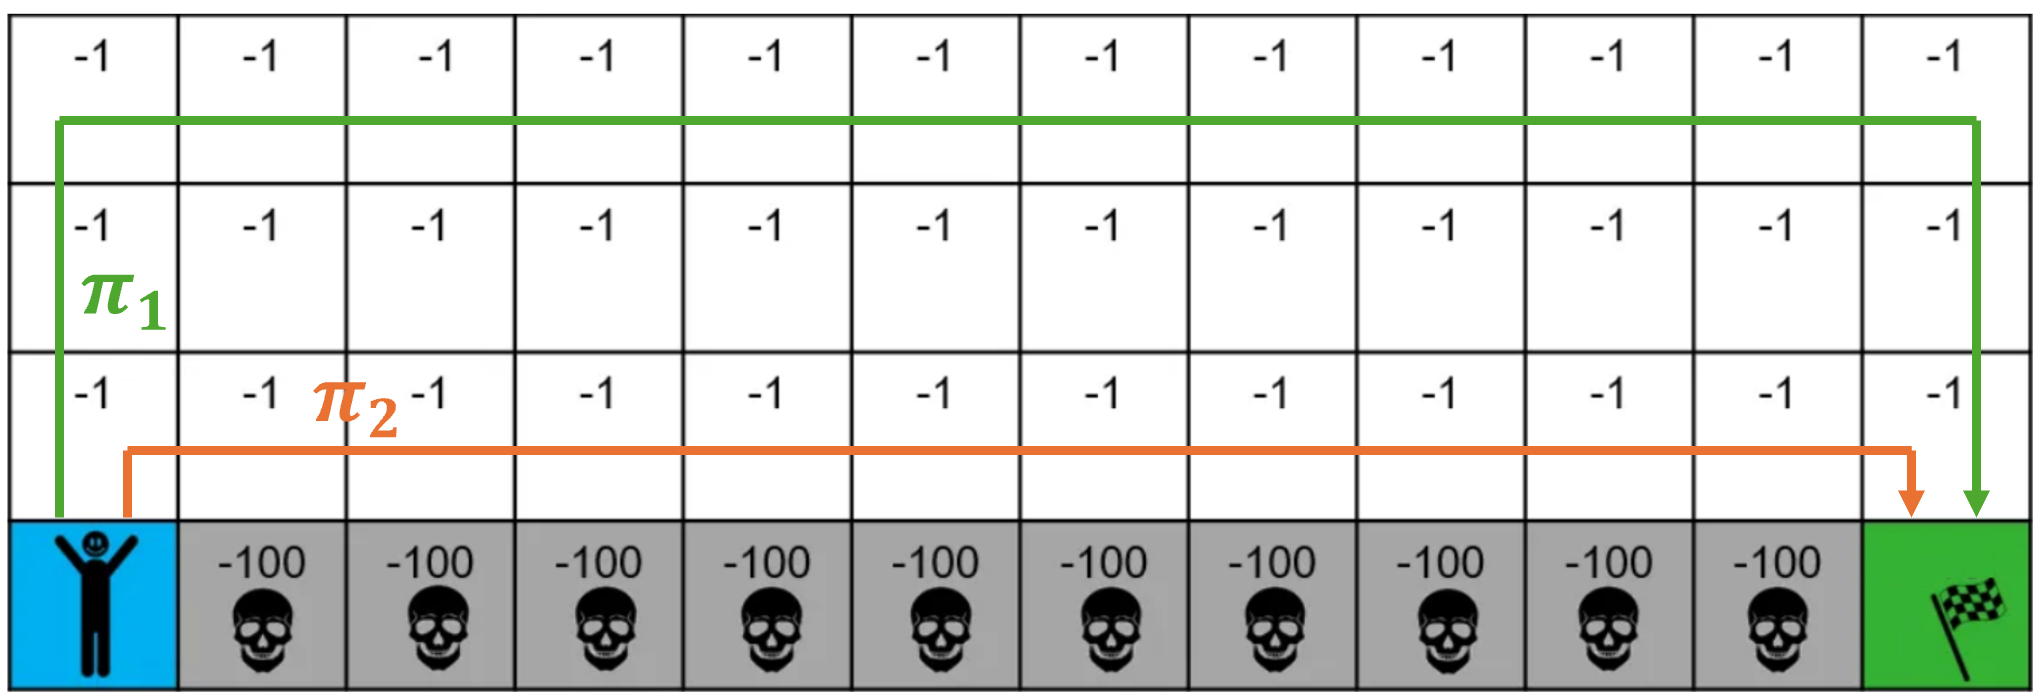


In [46]:
class Pi_1:
    def __init__(self):
        self.action_table = [
            [+3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +2],
            [+3, +3, +3, +3, +3, +3, +3, +3, +3, +3, +3, +2],
            [+3, +3, +3, +3, +3, +3, +3, +3, +3, +3, +3, +2],
            [+0, +0, +0, +0, +0, +0, +0, +0, +0, +0, +0, +2],
        ]

    def take_action(self, x, y):
        return self.action_table[x][y]

class Pi_2:
    def __init__(self):
        self.action_table = [
            [+3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +2],
            [+0, +0, +0, +0, +0, +0, +0, +0, +0, +0, +0, +2],
            [+2, +2, +2, +2, +2, +2, +2, +2, +2, +2, +2, +2],
            [+2, +2, +2, +2, +2, +2, +2, +2, +2, +2, +2, +2],
        ]

    def take_action(self, x, y):
        return self.action_table[x][y]

class Pi_3:
    def __init__(self):
        self.action_table = [
            [+3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +2],
            [+3, +3, +3, +3, +3, +3, +3, +3, +3, +3, +3, +2],
            [+3, +3, +3, +3, +3, +3, +3, +3, +3, +3, +3, +2],
            [+0, +0, +0, +0, +0, +0, +0, +0, +0, +0, +0, +2],
        ]

    def take_action(self, x, y):
        if random.uniform(0, 1) < 0.2 or self.action_table[x][y] == -1:
            return random.randint(0, 3)
        else:
            return self.action_table[x][y]

class Pi_4:
    def __init__(self):
        self.action_table = [
            [+3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +2],
            [+0, +0, +0, +0, +0, +0, +0, +0, +0, +0, +0, +2],
            [+2, +2, +2, +2, +2, +2, +2, +2, +2, +2, +2, +2],
            [+2, +2, +2, +2, +2, +2, +2, +2, +2, +2, +2, +2],
        ]

    def take_action(self, x, y):
        if random.uniform(0, 1) < 0.2 or self.action_table[x][y] == -1:
            return random.randint(0, 3)
        else:
            return self.action_table[x][y]

pi_1 = Pi_1()
pi_2 = Pi_2()
pi_3 = Pi_3()
pi_4 = Pi_4()

Please complete the function `compute_Q_table` below, which will recalculate the Q table under a given policy. We will use this function to compute the Q tables for $\pi_1$, $\pi_2$, $\pi_3$, and $\pi_4$, as well as recalculate the Q tables corresponding to the policies ultimately learned through the SARSA policy, Q learning behavior policy, and Q learning target policy. You may refer to the following equation during your recursive computation:
$$
Q^\pi(s,a) = \sum_{s'}T(s,a,s')\left[R(s,a,s') + \gamma \sum_{a'} \pi(a'|s') Q^\pi(s',a')\right]
$$

In [47]:
def compute_Q_table(q_table, policy, num_episodes=10000, next_action_sample_size=40):
    """ YOUR CODE HERE """
    env = Env(q_table.length, q_table.height)
    for _ in range(num_episodes):
        env.reset()
        state = [0, 0]
        is_terminated = False
        while not is_terminated:
            action = policy.take_action(state[0], state[1])
            reward, next_state, is_terminated = env.step(action)
            value = 0
            for _ in range(next_action_sample_size):
                next_action = policy.take_action(next_state[0], next_state[1])
                value += q_table.table[q_table._index(next_action, next_state[0], next_state[1])]
            q_table.table[q_table._index(action, state[0], state[1])] = reward + q_table.gamma * value / next_action_sample_size
            state = next_state
    """ END CODE HERE """
    return q_table

q_table = Base_Q_table(12, 4, gamma=0.95, eps=eps, alpha=0.1)
policy1_table = np.array(compute_Q_table(q_table, pi_1).table)
q_table = Base_Q_table(12, 4, gamma=0.95, eps=eps, alpha=0.1)
policy2_table = np.array(compute_Q_table(q_table, pi_2).table)
q_table = Base_Q_table(12, 4, gamma=0.95, eps=eps, alpha=0.1)
policy3_table = np.array(compute_Q_table(q_table, pi_3).table)
q_table = Base_Q_table(12, 4, gamma=0.95, eps=eps, alpha=0.1)
policy4_table = np.array(compute_Q_table(q_table, pi_4).table)

q_table = Base_Q_table(12, 4, gamma=0.95, eps=eps, alpha=0.1)
agent = Q_table_sarsa(height=height, length=length, gamma=gamma, eps=0.2, alpha=alpha)
agent.cliff_walk()
SARSA_table = np.array(compute_Q_table(q_table, agent).table)

q_table = Base_Q_table(12, 4, gamma=0.95, eps=eps, alpha=0.1)
agent = Q_table_qlearning(height=height, length=length, gamma=gamma, eps=0.2, alpha=alpha)
agent.cliff_walk()
Q_learning_behavior_table = np.array(compute_Q_table(q_table, agent).table)

class Q_learning_target:
    def __init__(self, agent):
        self.agent = agent

    def take_action(self, x, y):
        return self.agent.best_action(x, y)

q_table = Base_Q_table(12, 4, gamma=0.95, eps=eps, alpha=0.1)
Q_learning_target_table = np.array(compute_Q_table(q_table, Q_learning_target(agent)).table)

def compare_Q_tables(table1, table2):
    return np.average(abs(np.array(table1) - np.array(table2)))

print("Comparing SARSA Q table with pre-defined policies:")
print("With pi_1: ", compare_Q_tables(SARSA_table, policy1_table))
print("With pi_2: ", compare_Q_tables(SARSA_table, policy2_table))
print("With pi_3: ", compare_Q_tables(SARSA_table, policy3_table))
print("With pi_4: ", compare_Q_tables(SARSA_table, policy4_table))

print("Comparing Q-learning behavior table with pre-defined policies:")
print("With pi_1: ", compare_Q_tables(Q_learning_behavior_table, policy1_table))
print("With pi_2: ", compare_Q_tables(Q_learning_behavior_table, policy2_table))
print("With pi_3: ", compare_Q_tables(Q_learning_behavior_table, policy3_table))
print("With pi_4: ", compare_Q_tables(Q_learning_behavior_table, policy4_table))

print("Comparing Q-learning target table with pre-defined policies:")
print("With pi_1: ", compare_Q_tables(Q_learning_target_table, policy1_table))
print("With pi_2: ", compare_Q_tables(Q_learning_target_table, policy2_table))
print("With pi_3: ", compare_Q_tables(Q_learning_target_table, policy3_table))
print("With pi_4: ", compare_Q_tables(Q_learning_target_table, policy4_table))

Comparing SARSA Q table with pre-defined policies:
With pi_1:  12.966889802939582
With pi_2:  13.195096759903516
With pi_3:  1.5025167318011892
With pi_4:  10.425475588359008
Comparing Q-learning behavior table with pre-defined policies:
With pi_1:  20.335818332537677
With pi_2:  20.56402528950161
With pi_3:  8.424516875145267
With pi_4:  4.884716529708166
Comparing Q-learning target table with pre-defined policies:
With pi_1:  0.8983823039618722
With pi_2:  0.0
With pi_3:  12.576228787881115
With pi_4:  22.329963662584532


In the code above, we utilize the `compare_Q_tables` function to assess the similarity among different Q tables. Specifically, we evaluate the similarity of the SARSA Q table, Q learning behavior policy Q table, and Q learning target policy Q table against $\pi_1$, $\pi_2$, $\pi_3$, and $\pi_4$.

**Questions.** Based on this analysis, please answer the following questions:

- Determine that the Q-table of the SARSA, Q-learning (behavior), and Q-learning (target) algorithm is most consistent with the Q table of which algorithm we manually defined. You may draw conclusions from various perspectives, such as the visualized trajectories and the degree of similarity in the Q tables.
  - Note that the visualized trajectories can involve randomness to some extent, we mainly focus on the degree of similarity in the Q tables. We can see that the SARSA policy is most consistent with $\pi_3$, the Q-learning behavior policy is most consistent with $\pi_4$, and the Q-learning target policy is exactly the same as $\pi_2$.
- Please provide a detailed analysis of the reasons behind these results.
  - SARSA is an on-policy algorithm with an $\epsilon$-greedy exploration strategy. Such properties encourage the agent to avoid the risk of falling into the cliff when exploring. Hence, SARSA learns a conservative policy which is consistent with $\pi_3$.
  - Q-learning is an off-policy algorithm. The behavior policy applies an $\epsilon$-greedy strategy, but Q-learning always selects the action with the highest value when updating. Hence, Q-learning learns a more aggressive behavior policy which is consistent with $\pi_4$.
  - Different from the behavior policy, the target policy in Q-learning does not envolve exploration. The target policy always selects the action with the highest value directly. Hence, Q-learning learns an optimal target policy which is exactly the same as $\pi_2$.